In [344]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# path = 'D:\\z\\1\\ex2data1.txt'

# data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

# print('data = ')
# print(data.head(10) )
# print()
# print('data.describe = ')
# print(data.describe())


# positive = data[data['Admitted'].isin([1])]
# negative = data[data['Admitted'].isin([0])]

# fig, ax = plt.subplots(figsize=(5,5))
# ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
# ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
# ax.legend()
# ax.set_xlabel('Exam 1 Score')
# ax.set_ylabel('Exam 2 Score')

# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))


# nums = np.arange(-10, 10, step=1)

# fig, ax = plt.subplots(figsize=(5,5))
# ax.plot(nums, sigmoid(nums), 'r')

# def cost(theta, X, y):
#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     y = np.matrix(y)
#     first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
#     second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
#     return np.sum(first - second) / (len(X))

# # add a ones column - this makes the matrix multiplication work out easier
# data.insert(0, 'Ones', 1)

# # set X (training data) and y (target variable)
# cols = data.shape[1]
# X = data.iloc[:,0:cols-1]
# y = data.iloc[:,cols-1:cols]

# # convert to numpy arrays and initalize the parameter array theta
# X = np.array(X.values)
# y = np.array(y.values)
# theta = np.zeros(3)

# print()
# print('X.shape = ' , X.shape)
# print('theta.shape = ' , theta.shape)
# print('y.shape = ' , y.shape)

# thiscost = cost(theta, X, y)
# print()
# print('cost = ' , thiscost)

# def gradient(theta, X, y):
#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     y = np.matrix(y)
    
#     parameters = int(theta.ravel().shape[1])
#     grad = np.zeros(parameters)
    
#     error = sigmoid(X * theta.T) - y
    
#     for i in range(parameters):
#         term = np.multiply(error, X[:,i])
#         grad[i] = np.sum(term) / len(X)
    
#     return grad

# import scipy.optimize as opt
# result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))



# costafteroptimize = cost(result[0], X, y)
# print()
# print('cost after optimize = ' , costafteroptimize)
# print()

# def predict(theta, X):
#     probability = sigmoid(X * theta.T)
#     return [1 if x >= 0.5 else 0 for x in probability]

# theta_min = np.matrix(result[0])
# predictions = predict(theta_min, X)
# correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
# accuracy = (sum(map(int, correct)) % len(correct))
# print ('accuracy = {0}%'.format(accuracy))


In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [346]:
path = '/Users/fox/Desktop/ML_Art/Classification_code/data1.txt'
data = pd.read_csv(path, header = None, names = ['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [347]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [348]:
data_1 = pd.DataFrame({'One':[4,6,8,10]})
data_1.head()

,One
0,4
1,6
2,8
3,10


In [349]:
data_1.describe()

,One
count,4.000000
mean,7.000000
std,2.581989
min,4.000000
25%,5.500000
50%,7.000000
75%,8.500000
max,10.000000


### mathematical formula to calculate the 25%?
### [4,6,8,10]
`min+(max-min)*percentile`

* res_25 = 4+(10-4)*percentile = 4+(10-4)*25% = 5.5

* res_75 = 4+(10-4)*percentile = 4+(10-4)*75% = 8.5

In [350]:
positive = data[data['Admitted'] == 1]
negative = data[data['Admitted'] == 0]

In [351]:
positive.head()

,Exam 1,Exam 2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


In [352]:
negative.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


In [353]:
print('positive values = ' , len(positive))
print('negative values = ', len(negative))

positive values =  60
negative values =  40


# Plot the positive & negetive data

Text(0, 0.5, 'Exam 2 Score')

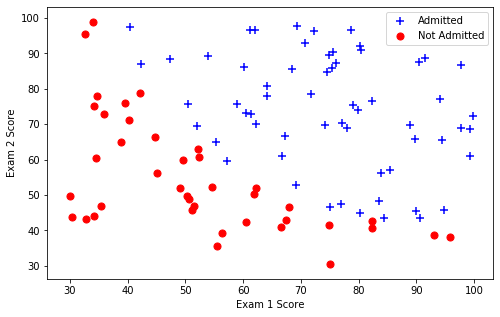

In [354]:
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s = 50 , c = 'b' , marker = '+' , label = 'Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s = 50 , c = 'r' , marker = 'o' , label = 'Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')


## Sigmoid Function

In [355]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## ploting the sigmoid function

Text(0.5, 1.0, 'Sigmoid Function')

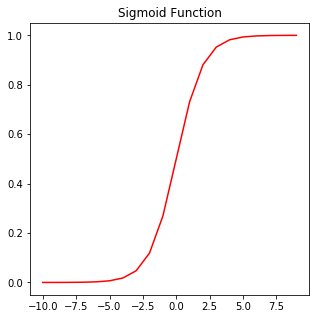

In [356]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums), 'r')
ax.set_title('Sigmoid Function')

## Cost Function

In [357]:
def cost(theta, X, y):
    theta_Val = np.matrix(theta)
    X_Val = np.matrix(X)
    y_Val = np.matrix(y)
    first_term  = np.multiply(y_Val, np.log(sigmoid(X_Val*theta_Val.T)))
    second_term = np.multiply(1-y_Val, np.log(1-sigmoid(X_Val*theta_Val.T)))
    summation_term = np.sum(first_term+second_term) / len(X_Val)
    return -1 * summation_term    


## insert Ones col for applaying the function

In [358]:
data.insert(0, 'Ones' , 1)
data.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


## set X (training data) and y (target variable)

In [359]:
data.shape

(100, 4)

In [360]:
cols = data.shape[1] # 4
X = data.iloc[: , :cols-1]
y = data.iloc[: , cols-1:]

In [361]:
X.head()

,Ones,Exam 1,Exam 2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


In [362]:
y.head()

,Admitted
0,0
1,0
2,0
3,1
4,1


## convert to numpy arrays and initalize the parameter array theta

In [363]:
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)
# 3 thetas , because we have 2 variable [Exam 1 , Exam 2]
# number of thetas = number of varibles + 1

In [364]:
print('X.shape = ' , X.shape)
print('theta.shape = ' , theta.shape)
print('y.shape = ' , y.shape)

X.shape =  (100, 3)
theta.shape =  (3,)
y.shape =  (100, 1)


In [365]:
the_Cost_befor_optimize = cost(theta, X, y)
print('the Cost befor optimize is  = ' , the_Cost_befor_optimize)

the Cost befor optimize is  =  0.6931471805599453


## The Gradient Descent

In [366]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad


In [367]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [368]:
print('the best valuse for three thetas is =\n{}'.format(result[0]))
    

the best valuse for three thetas is =
[-25.16131863   0.20623159   0.20147149]


## cost after best theats

In [369]:
the_cost_after_optimize = cost(result[0] ,X ,y)
print('the cost before optimize is = {}\nthe cost after optimize is  = {}'.format(the_Cost_befor_optimize , the_cost_after_optimize))

the cost before optimize is = 0.6931471805599453
the cost after optimize is  = 0.20349770158947458


## for knowing the efficiency

In [370]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [371]:
best_thetas = np.matrix(result[0])
predictions = predict(best_thetas, X)
predictions[:20]

[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]

## calculate the accuracy

In [374]:
correct = [1 if a + b == 2 or a + b == 0 else 0for (a, b) in zip(predictions, y)]
accuracy = np.sum(correct) % len(correct)
print(sum(correct))
print('Accuracy is = {}%'.format(accuracy))


89
Accuracy is = 89%
